Nguyễn Tuấn Duy - 11204971

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import manifold, datasets
from matplotlib.ticker import NullFormatter

2. Dùng thư viện sklearn, chạy lại với các dataset dưới, nhận xét khi thay đổi perplexity, https://scikit-learn.org/stable/auto_examples/manifold/plot_t_sne_perplexity.html#sphx-glr-auto-examples-manifold-plot-t-sne-perplexity-py

c:\Users\DELL24H.VN\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\DELL24H.VN\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\DELL24H.VN\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\DELL24H.VN\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\DELL24H.VN\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\DELL24H.VN\anaconda3\lib\site-packages\sklearn\manifold\

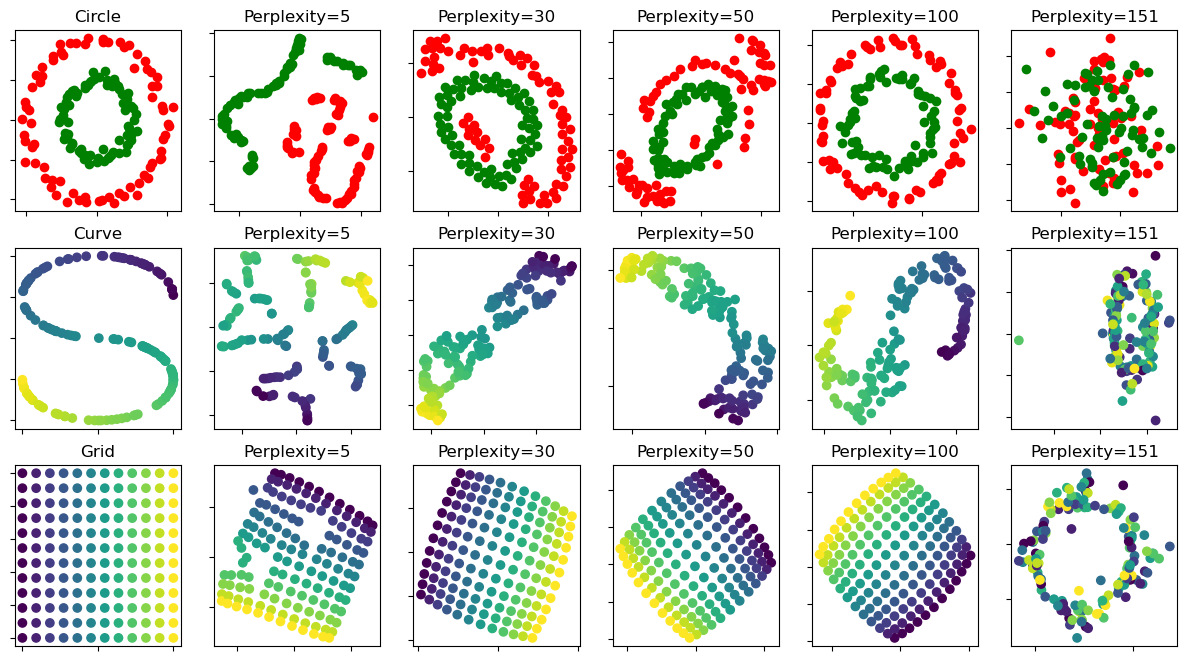

In [2]:
n_samples = 150
n_components = 2
(fig, subplots) = plt.subplots(3, 6, figsize=(15, 8))
perplexities = [5, 30, 50, 100, 151]

X, y = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=0
)

red = y == 0
green = y == 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.set_title("Circle")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

for i, perplexity in enumerate(perplexities):
    tsne = manifold.TSNE(n_components= n_components, perplexity= perplexity, init = "random", n_iter= 300, random_state=0)
    Y = tsne.fit_transform(X)
    ax = subplots[0][i + 1]
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

X1, colors = datasets.make_s_curve(
    n_samples=n_samples, random_state=0
)

ax = subplots[1][0]
ax.scatter(X1[:, 0], X1[:, 2], c = colors)
ax.set_title("Curve")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    tsne = manifold.TSNE(n_components= n_components, perplexity= perplexity, init = "random", n_iter= 300, random_state=0, learning_rate="auto")
    Y1 = tsne.fit_transform(X1)
    ax = subplots[1][i + 1]
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y1[:, 0], Y1[:, 1], c = colors)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")   

x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X2 = np.hstack(
    [
        xx.ravel().reshape(-1, 1),
        yy.ravel().reshape(-1, 1),
    ]
)
color = xx.ravel()
ax = subplots[2][0]
ax.scatter(X2[:, 0], X2[:, 1], c=color)
ax.set_title("Grid")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    tsne = manifold.TSNE(n_components= n_components, perplexity= perplexity, init = "random", n_iter= 400, random_state=0)
    Y2 = tsne.fit_transform(X2)

    ax = subplots[2][i + 1]
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y2[:, 0], Y2[:, 1], c = color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

3. Dùng word embedding (https://habr.com/en/company/vk/blog/449984/), chọn ra 10 từ bất kì, với mỗi từ tìm 10 từ có embedding gần nhất

In [3]:
import gensim

import multiprocessing
from gensim.models import Word2Vec


def train_word2vec(filename):
    data = gensim.models.word2vec.LineSentence(filename)
    return Word2Vec(data, size=200, window=5, min_count=5, workers=multiprocessing.cpu_count())

In [4]:
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

In [6]:
keys = ['Paris', 'curry', 'duck', "goose", "steve", "dishwasher", "chair", "return", "man", "Python"]

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

In [7]:
word_clusters

[['Parisian',
  'Hopital_Europeen_Georges_Pompidou',
  'Spyker_D##_Peking',
  'France',
  'Pantheon_Sorbonne',
  'Aeroports_De',
  'Grigny_south',
  'Place_Denfert_Rochereau',
  'guest_Olivier_Dolige',
  'Lazard_Freres_Banque'],
 ['curries',
  'chicken_curry',
  'vindaloo',
  'balti',
  'lamb_curry',
  'pilau_rice',
  'tikka_masala',
  'naan_bread',
  'tandoori',
  'vindaloos'],
 ['ducks',
  'Joshua_Linhares',
  'Aflac_dumps',
  'firefights_erupt_outside',
  'Peking_roast',
  'drake_mallard',
  'goose',
  'black_bellied_whistling',
  'bird',
  'bluebill'],
 ['geese',
  'bird',
  'pheasant',
  'turkey',
  'Canada_geese',
  'waterfowl',
  'moose',
  'mallard',
  'squirrel',
  'Geese'],
 ['dave',
  'jeff',
  'jason',
  'robert',
  'george',
  'kevin',
  'todd',
  'jeremy',
  'ryan',
  'greg'],
 ['dishwashers',
  'washing_machine',
  'dish_washer',
  'washer',
  'kitchen',
  'dishwashing',
  'refrigerator',
  'Bosch_dishwasher',
  'clothes_washer',
  'dishwashing_machine'],
 ['chairs',
  '

In [8]:
tsne_model_en_2d = manifold.TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

c:\Users\DELL24H.VN\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\DELL24H.VN\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

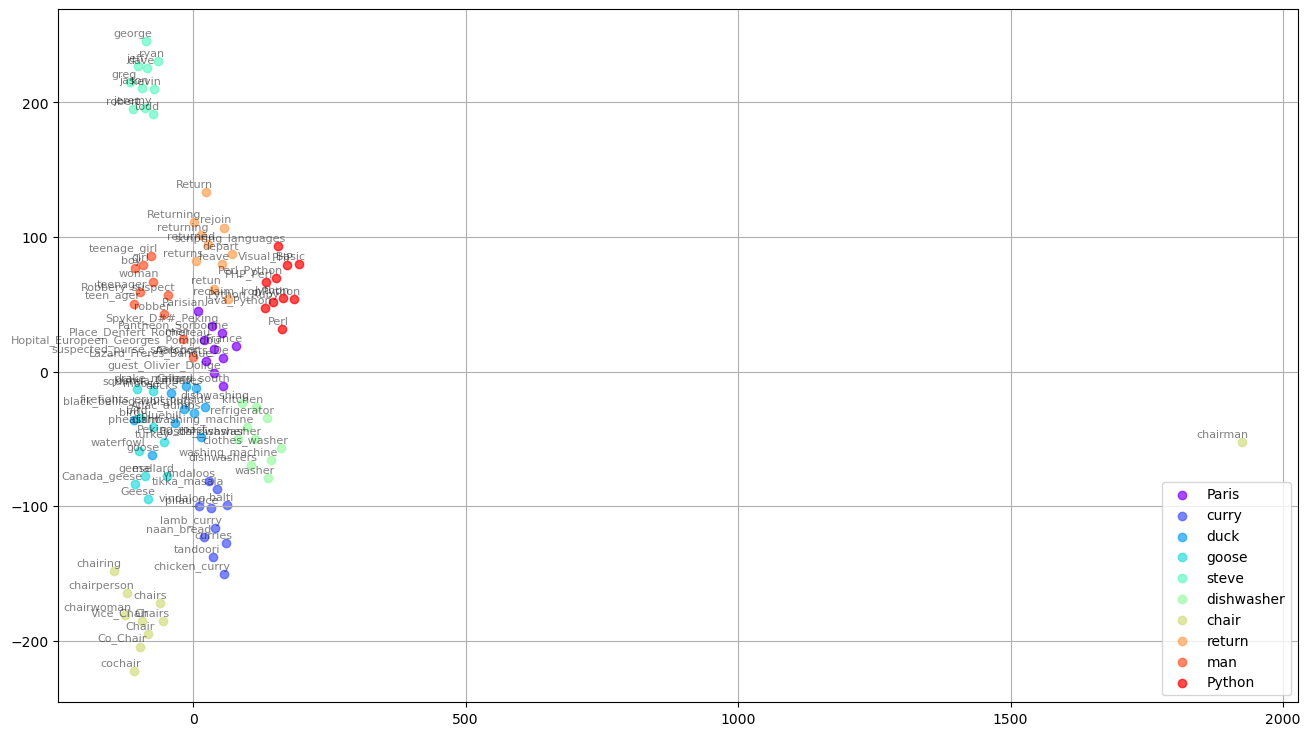

In [9]:
import matplotlib.cm as cm 
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), 
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.grid(True)
    plt.show()


tsne_plot_similar_words(keys, embeddings_en_2d, word_clusters)

In [10]:
word_clusters[8]

['woman',
 'boy',
 'teenager',
 'teenage_girl',
 'girl',
 'suspected_purse_snatcher',
 'robber',
 'Robbery_suspect',
 'teen_ager',
 'men']

In [12]:
word_clusters[2]

['ducks',
 'Joshua_Linhares',
 'Aflac_dumps',
 'firefights_erupt_outside',
 'Peking_roast',
 'drake_mallard',
 'goose',
 'black_bellied_whistling',
 'bird',
 'bluebill']

In [13]:
for i in word_clusters:
    print(i)

['Parisian', 'Hopital_Europeen_Georges_Pompidou', 'Spyker_D##_Peking', 'France', 'Pantheon_Sorbonne', 'Aeroports_De', 'Grigny_south', 'Place_Denfert_Rochereau', 'guest_Olivier_Dolige', 'Lazard_Freres_Banque']
['curries', 'chicken_curry', 'vindaloo', 'balti', 'lamb_curry', 'pilau_rice', 'tikka_masala', 'naan_bread', 'tandoori', 'vindaloos']
['ducks', 'Joshua_Linhares', 'Aflac_dumps', 'firefights_erupt_outside', 'Peking_roast', 'drake_mallard', 'goose', 'black_bellied_whistling', 'bird', 'bluebill']
['geese', 'bird', 'pheasant', 'turkey', 'Canada_geese', 'waterfowl', 'moose', 'mallard', 'squirrel', 'Geese']
['dave', 'jeff', 'jason', 'robert', 'george', 'kevin', 'todd', 'jeremy', 'ryan', 'greg']
['dishwashers', 'washing_machine', 'dish_washer', 'washer', 'kitchen', 'dishwashing', 'refrigerator', 'Bosch_dishwasher', 'clothes_washer', 'dishwashing_machine']
['chairs', 'Chair', 'chairperson', 'chairwoman', 'chairman', 'Vice_Chair', 'Co_Chair', 'chairing', 'Chairs', 'cochair']
['returning', '

a) nhận xét về ngữ nghĩa các từ có embedding gần nhau (trong file latex)